# ME4 Machine Learning - Tutorial 10

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.svm import SVC
%matplotlib agg

In [2]:
data = pd.read_csv('slip_data.csv').to_numpy()
f1, f1ang, f2, f2ang, m, slips = data.T

In [3]:
def gen_sample_grid(npx=200, npy=200, x1_lims=(-1, 1), x2_lims=(-1, 1)):
  x1line = np.linspace(x1_lims[0], x1_lims[1], npx)
  x2line = np.linspace(x2_lims[0], x2_lims[1], npy)
  x1grid, x2grid = np.meshgrid(x1line, x2line)
  Xgrid = np.array([x1grid, x2grid]).reshape([2,npx*npy]).T
  return Xgrid,x1line,x2line

In [4]:
X = np.array([f2, f2ang]).T
y = slips
print(len(y))
svm = SVC(C=1000, gamma='scale', kernel='rbf')

fig, ax = plt.subplots()

### your code here:
svm.fit(X, y)
npx, npy = 200, 200
Xgrid,x1line,x2line = gen_sample_grid(npx, npy, (0, 40), (0, 360))

class_vals = svm.predict(Xgrid)
class_vals = np.reshape(class_vals, [npx, npy])

1000


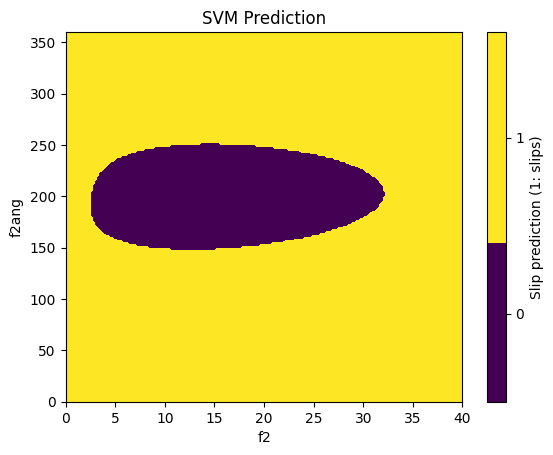

In [5]:
c = np.random.randint(0, 2, y.shape)
n_clusters = 2
cmap = plt.get_cmap('viridis', n_clusters)
contour = ax.contourf(x1line, x2line, class_vals, cmap=cmap)

cbar = fig.colorbar(contour, ax=ax)
tick_locs = np.linspace(c.min(), c.max(), 2 * n_clusters + 1)[1::2]
cbar_tick_label = np.arange(c.min(), c.max() + 1)
cbar.set_ticks(tick_locs)
cbar.set_ticklabels(cbar_tick_label)
cbar.set_label('Slip prediction (1: slips)')

ax.set_xlabel('f2')
ax.set_ylabel('f2ang')
ax.set_title('SVM Prediction')

fig

In [6]:
def slips(f2, f2ang):
    f1, f1ang, mumg = 18, np.deg2rad(20), 0.5*3*9.81
    f2ang = np.deg2rad(f2ang)
    x = f1**2 + f2**2 + 2 * f1 * f2 * np.cos(f1ang - f2ang) - mumg**2
    return x > 0

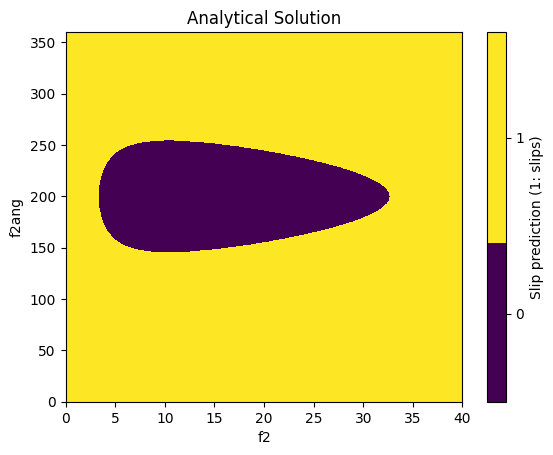

In [7]:
npx, npy = 1000, 1000
Xgrid,x1line,x2line = gen_sample_grid(npx, npy, (0, 40), (0, 360))
y_real = np.array([slips(x[0], x[1]) for x in Xgrid])
y_real = np.reshape(y_real, [npx, npy])


fig, ax = plt.subplots()
c = np.random.randint(0, 2, y_real.shape)
n_clusters = 2
cmap = plt.get_cmap('viridis', n_clusters)
contour = ax.contourf(x1line, x2line, y_real, cmap=cmap)

cbar = fig.colorbar(contour, ax=ax)
tick_locs = np.linspace(c.min(), c.max(), 2 * n_clusters + 1)[1::2]
cbar_tick_label = np.arange(c.min(), c.max() + 1)
cbar.set_ticks(tick_locs)
cbar.set_ticklabels(cbar_tick_label)
cbar.set_label('Slip prediction (1: slips)')

ax.set_xlabel('f2')
ax.set_ylabel('f2ang')
ax.set_title('Analytical Solution')
fig

In [8]:
data = pd.read_csv('slip_data_full.csv').to_numpy()
f1, f1ang, f2, f2ang, m, y = data.T

In [9]:
def gen_sample_grid(npx=200, npy=200, x1_lims=(-1, 1), x2_lims=(-1, 1)):
  x1line = np.linspace(x1_lims[0], x1_lims[1], npx)
  x2line = np.linspace(x2_lims[0], x2_lims[1], npy)
  x1grid, x2grid = np.meshgrid(x1line, x2line)
  Xgrid = np.array([x1grid, x2grid]).reshape([2,npx*npy]).T
  Xall = np.array([[10, 30, x[0], x[1]] for x in Xgrid])
  return Xall,x1line,x2line

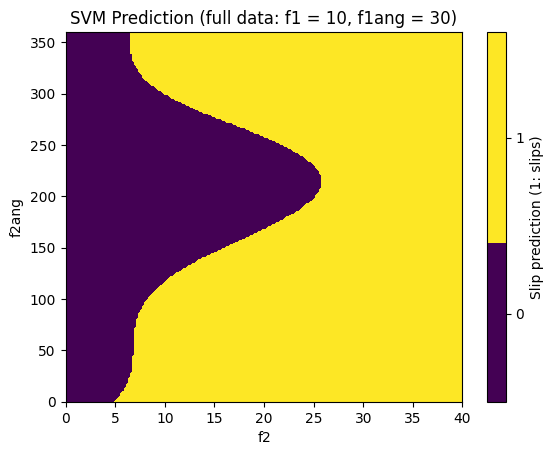

In [10]:
X = np.array([f1, f1ang, f2, f2ang]).T
svm = SVC(C=1000, gamma='scale', kernel='rbf', degree=2)

fig, ax = plt.subplots()

### your code here:
svm.fit(X, y)
npx, npy = 200, 200
Xall,x1line,x2line = gen_sample_grid(npx, npy, (0, 40), (0, 360))

class_vals = svm.predict(Xall)
class_vals = np.reshape(class_vals, [npx, npy])

c = np.random.randint(0, 2, y.shape)
n_clusters = 2
cmap = plt.get_cmap('viridis', n_clusters)
contour = ax.contourf(x1line, x2line, class_vals, cmap=cmap)

cbar = fig.colorbar(contour, ax=ax)
tick_locs = np.linspace(c.min(), c.max(), 2 * n_clusters + 1)[1::2]
cbar_tick_label = np.arange(c.min(), c.max() + 1)
cbar.set_ticks(tick_locs)
cbar.set_ticklabels(cbar_tick_label)
cbar.set_label('Slip prediction (1: slips)')

ax.set_xlabel('f2')
ax.set_ylabel('f2ang')
ax.set_title('SVM Prediction (full data: f1 = 10, f1ang = 30)')
fig